# TOP: PANDAS CHALLENGE

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from random import randint
from matplotlib import pyplot as plt
import seaborn as sns

For this exercise it is required to use only three libraries: Pandas, Numpy and Sklearn -this last one for the Decision tree and the confusion matrix-. Additionally, we imported the random and matplotlib libraries to make the exercise more complete and visual.

To continue we upload both _Train and Test_ databases. For this exercise it is only required to use the _Train Database_.

In [2]:
data_test = pd.read_csv('test.csv')
data_train = pd.read_csv('train.csv')

In [3]:
data_train.head(6)

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,checking_account_status_A12,checking_account_status_A13,checking_account_status_A14,...,other_installment_plans_A142,other_installment_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202,target
0,36,8086.0,2.0,4.0,42.0,4.0,1,1,0,0,...,0,1,1,0,0,0,1,1,0,1
1,15,3812.0,1.0,4.0,23.0,1.0,1,0,0,1,...,0,1,1,0,0,1,0,1,0,0
2,36,2145.0,2.0,1.0,24.0,2.0,1,0,0,0,...,0,1,1,0,0,1,0,1,0,1
3,12,2578.0,3.0,4.0,55.0,1.0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4,21,5003.0,1.0,4.0,29.0,2.0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,1
5,15,2327.0,2.0,3.0,25.0,1.0,1,0,1,0,...,0,1,1,0,1,0,0,0,0,1


 ## MODELLING ON DATA TRAIN

We constructed a function to split the Database in a _train and test database_, the former one with a size of the 30%, and random state equal to 42 for reproduction of the results.

In [23]:
def uplo(db):
    y = db['target']
    X = db.drop('target', axis=1)
    xt, xte, yt, yte = train_test_split(X, y, test_size=0.3, random_state=42)
    print('The shape of dataset:', X.shape[0])
    print('The shape of the X dataset:', xt.shape[0])
    
    return xt,xte,yt,yte

In [24]:
X_train, X_test, y_train, y_test = uplo(data_train)

The shape of dataset: 900
The shape of the X dataset: 630


The dataset has a size of 900 rows and the _X_train_ dataset of size 630.

## CORRELATION MATRIX

To continue we construct a _Correlation Matrix_ to take the most significant variables with the _target variable_, this is not required in the exercise. 

And we study the 10 most important.

In [6]:
corrMatrix = data_train.corr()

print(corrMatrix['target'][:10].sort_values(ascending=False))

duration                       0.223492
credit_amount                  0.168680
checking_account_status_A12    0.116657
installment_rate               0.065554
present_residence              0.007676
dependents                    -0.002630
existing_credits              -0.055938
checking_account_status_A13   -0.082670
age                           -0.097674
checking_account_status_A14   -0.315427
Name: target, dtype: float64


From the correlation matrix, we take as other to important variables: _duration_ and _age_ being the former with the highest positive correlation and the latest with the negative correlation from the most important 10 variables. 

In [9]:
col = ['target','duration'               ,        
'credit_amount'                 ,
'checking_account_status_A12'   , 
'installment_rate'              , 
'present_residence'             , 
'dependents'                    ,
'existing_credits'             ,
'checking_account_status_A13'  , 
'age', 'checking_account_status_A14']

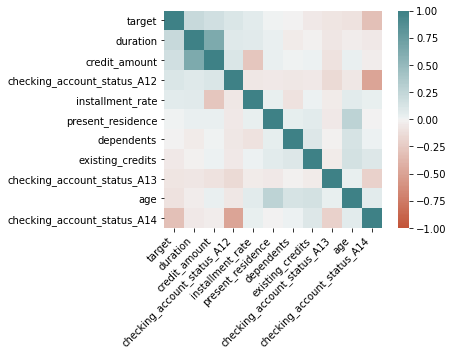

In [12]:
corr = data_train[col].corr()

ax = sns.heatmap(  corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True)

ax.set_xticklabels(ax.get_xticklabels(),
    rotation=45, horizontalalignment='right');

After the correlation matrix, we decided to take two variables that have a considerable high (positive or negatice) with the target variable, this are: `duration and age`.

In the next step, we construct an empty list that will save the metrics from the Classifier tree, then we take 5 random variables from the `Train database` and add the other 2 most correlated variables.

In [13]:
fp = []
nu = [randint(2, 49) for p in range(2, 7)]
nam = list(X_train.columns[nu])
nam.extend(['duration','age'])
nam

['present_residence',
 'credit_history_A31',
 'job_A172',
 'purpose_A41',
 'purpose_A48',
 'duration',
 'age']

Finally, we define a function that consider five arguments:

i) the empty list for metrics, ii) the train dataset, iii) the test dataset, iv) the target variable, and v) the target variable for the test dataset.

The most relevant part of the function makes the permutation for each of the ramdon variables selected plus 'duration' and 'age'. Each of this permutation is saved in a temporal dataframe which is consider for the Classification exercise.

Once we perform the Classification, we make the prediction on the Test dataset, construct the Confussion Matrix and save the `false positive` values of each iteration and saved in a list. After the loop is finished, we finally perform the _Classification exercise_ on the original Train dataset and take its metric.

In [14]:
def stree(fl,xt,xte,yt,yte):
    for i in xt.loc[:,nam]:
        df = xt.iloc[np.random.permutation(xt[i].values)]
        clf = DecisionTreeClassifier()
        clf = clf.fit(df,yt)
        
        #Predict the response for test dataset
        y_pred = clf.predict(xte)
        cm = confusion_matrix(yte, y_pred)
        print(cm[1,0])
        fl.append(cm[1,0])
   
    clf = clf.fit(xt,yt)
    y_base = clf.predict(xte)
    cm = confusion_matrix(yte, y_base)
    fl.append(cm[1,0])
    return fl

In [15]:
stree(fp,X_train,X_test,y_train,y_test)

71
71
71
71
26
61
54


[71, 71, 71, 71, 26, 61, 54, 31]

In [17]:
re = nam.copy()
re.append('BASE')

['present_residence',
 'credit_history_A31',
 'job_A172',
 'purpose_A41',
 'purpose_A48',
 'duration',
 'age',
 'BASE']

Once we perform our Classication tree, we plot the metrics (false positive) for each variable plus the original train dataset (called Base).

We see that the variable with least error is `purpose_A48` followed by our `Base model`; the other two variables with least error are: `duration` and `age`.

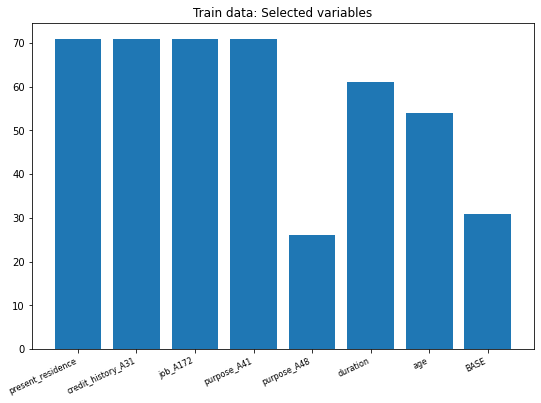

In [18]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.bar(re, fp)
plt.setp(plt.gca().get_xticklabels(), rotation=25, horizontalalignment='right', fontsize=8)
plt.title('Train data: Selected variables')
plt.show()

 ## MODEL ON DATA TEST

Finally, to test our previous model considering the same variables and specification for the Classification tree, we reply it on the Test dataset. 

We could see that the Test sample is considerable small with a size of 100 rows, and only 70 rows for the X dataset.

In [25]:
X_train, X_test, y_train, y_test = uplo(data_test)

The shape of dataset: 100
The shape of the X dataset: 70


In [26]:
fpt = []
stree(fpt,X_train,X_test,y_train,y_test)

10
10
10
10
10
5
8


[10, 10, 10, 10, 10, 5, 8, 6]

In [27]:
ret = nam.copy()
ret.append('TEST')

After we perform the previous Classification model, we plot it metrics, this time we found that the variable with least error is `duration` followed by the `Test model and age`. The other variables have a higher error.

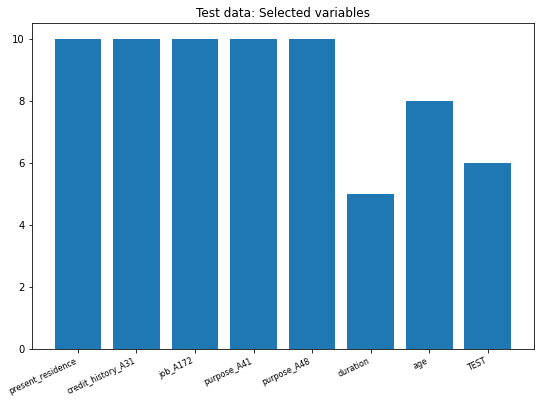

In [28]:
fig, ax = plt.subplots(figsize = (9, 6))
plt.bar(ret, fpt)
plt.setp(plt.gca().get_xticklabels(), rotation=25, horizontalalignment='right', fontsize=8)
plt.title('Test data: Selected variables')
plt.show()

To conclude we constructe a Dataframe zipping the results from the Train sample.

In [37]:
lt = pd.DataFrame(list(zip(re, fp)),columns =['Name', 'CM val'])
lt.index = lt.Name
lt.drop(columns='Name', inplace=True)

lt

,CM val
Name,
present_residence,71
credit_history_A31,71
job_A172,71
purpose_A41,71
purpose_A48,26
duration,61
age,54
BASE,31


To present the main variables and its metrics, we construct a dictionary that contains three arguments:

i) The error from the `Base model`.

ii) The results from the most import variables.

iii) The variable model with the least error, which in our case is different from the `Base model`.

In [41]:
Dict = {'fp': [fp[-1]],
        'most_important' : lt.loc[["purpose_A48", "age"]].to_dict(),
        'fp_most_important' : lt['CM val'].min()}